# Statistical modeling - Introduction
This document provides some visualization examples with ggplot2 and an introduction to regression analysis on housing data set. The aim here is to introduce basic modeling concepts and discuss data analytics pipeline.

In [1]:
# if packages do not exist, please install. These are the packages to be used through out the lectures
# install.packages('rtools')     #for installing some specific packages
# install.packages('openxlsx')   #for reading from Excel
# install.packages('ggplot2')    #for pretty visualization
# install.packages('data.table') #for efficient data manipulations
# install.packages('skimr') #for fast summary statistics
# install.packages('GGally')  #for pretty correlation visualization
# install.packages('ggcorrplot') #for pretty correlation visualization
# install.packages('repr')  #for plot resizing in html reports
# install.packages('factoextra')  #for future use in clustering
# install.packages('caret')  #for future use in model evaluation
# install.packages('rpart')  #for future use in tree-based modeling
# install.packages('rattle')  #for future use decision tree visualization
# install.packages('randomForest')  #for future use in random forests
# install.packages('knn')  #for future use in gradient boosting models
# install.packages('lubridate')  #for future use data time manipulation

### Using libraries and reading Excel files
Firstly, we are going to call required libraries for the analyses performed in this document. The cell above introduces the use cases for the respective package installation code as comments. For example, "openxlsx" package is used to read and write Excel files. 

Since this is a jupyter notebook (yet another interface for running R codes, similar to Rstudio or R terminal), we need some adjustments for plotting purposes. The lines where we have **options(repr.plot.width=25, repr.plot.height=20)** adjust the plot sizes in the html reports before we run a plotting function. Therefore they are not in the core of the analyses.

#### Working with files
There are several alternatives to provide data to an R session. This example uses an Excel file (house prices data) as an input. In order to read an Excel file from an R session, there are alternative packages. A popular one is **openxlsx** package. We make use of *read.xlsx* function from this package to read the data in the sheet name *data*. First argument to this function, namely *data_path*, is initialized as string (i.e. "/home/baydogan/Courses/Şişecam/data/housingdata.xlsx"). This is the path of the file in my local computer. If you would like to run the same codes, you need to adjust your path.

R requires Unix-style path definitions. If you are on a Windows system, you need to define your path accordingly. Suppose your file is located at "C:\Egitim\Sisecam\Statistical_Learning\data\housingdata.xlsx" (which is a Windows-style path). You need to define data_path variables as:

*data_path='C:/Egitim/Sisecam/Statistical_Learning/data/housingdata.xlsx'*

Note that backslash -> "\" is transformed to slash "/". The other option is to use double backslashes as:

*data_path='C:\\Egitim\\Sisecam\\Statistical_Learning\\data\\housingdata.xlsx'*

For further information on paths, you can check [this link](https://en.wikipedia.org/wiki/Path_(computing))

After reading the file, we check its structure with "str" function. This is generally suggested in order to see if we were able to read the data in memory as intended.

In [2]:
require(openxlsx, quietly = TRUE) #library(openxlsx) is the same
require(ggplot2, quietly = TRUE)
require(data.table, quietly = TRUE)
require(skimr, quietly = TRUE)
require(GGally, quietly = TRUE)
require(ggcorrplot, quietly = TRUE)
require(repr, quietly = TRUE)

# for plot sizing in html reports
options(repr.plot.width=25, repr.plot.height=20)

# this is my path to housing data, change accordingly
data_path='/home/baydogan/Courses/Şişecam/data/housingdata.xlsx'

# The other option is to choose using file manager
#data_path=file.choose()

housing=read.xlsx(data_path,sheet='data')
str(housing)


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



'data.frame':	506 obs. of  14 variables:
 $ CRIM   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ ZN     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ INDUS  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ CHAS   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ NOX    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ RM     : num  6.58 6.42 7.18 7 7.15 ...
 $ AGE    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ DIS    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ RAD    : num  1 2 2 3 3 3 5 5 5 5 ...
 $ TAX    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ PTRATIO: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ B      : num  397 397 393 395 397 ...
 $ LSTAT  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ MEDV   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


### Understanding basic statistical properties of the data
As discussed in the lectures, understanding the distributional characteristics of the data is important to see if there are any potential problems we may encounter during the model learning evaluation. This analysis includes the types of the variables (i.e. categrical, numerical and etc.), their sample statistics such as mean, median, standard deviation and etc, missing value ratios and others.

We make use of **skimr** package in order to perform this analysis. *skim* function provides a nice output summarizing all the necessary information about our data frame.

We have 14 numeric columns in the data. The last column MEDV is the median house price information in a town. Details of the variables are available in the provided Excel file (second sheet). Please check the definitions in the related sheet.

In [3]:
# numerical statistics of the data
summary_data=skim(housing)
print(summary_data)

── Data Summary ────────────────────────
                           Values 
Name                       housing
Number of rows             506    
Number of columns          14     
_______________________           
Column type frequency:            
  numeric                  14     
________________________          
Group variables            None   

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable n_missing complete_rate     mean      sd        p0      p25
 1 CRIM                  0             1   3.61     8.60    0.00632   0.0820
 2 ZN                    0             1  11.4     23.3     0         0     
 3 INDUS                 0             1  11.1      6.86    0.46      5.19  
 4 CHAS                  0             1   0.0692   0.254   0         0     
 5 NOX                   0             1   0.555    0.116   0.385     0.449 
 6 RM                    0             1   6.28     0.703   3.56      5.89  
 7 AGE                 

### Basic visualizations with ggplot
The given R code is performing data loading, data exploration, and visualization tasks. Let's break it down line by line:

1. **housing=data.table(housing)**: This line is converting the 'housing' data frame into a data.table. The data.table package is an extension of data.frame in R which provides more functionality and is often faster for large datasets. If housing is already a data.frame, it would be converted to a data.table; if it's already a data.table, the command would have no effect.

2. **str(housing)**: This line is calling the str function, which provides a compact, human-readable description of the object passed to it - in this case, the 'housing' data table. This will give an overview of the structure of the 'housing' data table, including the number of observations (rows), the number of variables (columns), and the type of each variable.

3. **options(repr.plot.width=7, repr.plot.height=7)**: This line is setting the default plot sizes in the Jupyter notebook. 'repr.plot.width' and 'repr.plot.height' are options in Jupyter notebook for R to control the size of plots. The width and height are both set to 7 (units are not explicitly stated but typically are inches).

4. **ggplot(housing, aes(x=MEDV)) + geom_histogram()**:  ggplot is a function from the 'ggplot2' package used for creating plots. ggplot2 is a powerful package for creating static, aesthetic graphs in R. The first argument is the data frame to use, here it's 'housing'. aes specifies the aesthetic mappings for the plot. x=MEDV sets the 'MEDV' variable as the x-axis, This line is creating a histogram plot of the 'MEDV' variable in the 'housing' data table. aes(x=MEDV) sets 'MEDV' as the variable of interest for the x-axis. geom_histogram() creates a histogram. A histogram provides a visual representation of the distribution of a dataset.

5. **ggplot(housing, aes(x=MEDV)) + geom_boxplot()**: This line is creating a boxplot of the 'MEDV' variable in the 'housing' data table. Like the previous line, aes(x=MEDV) sets 'MEDV' as the variable of interest, and geom_boxplot() creates a boxplot. A boxplot is a standardized way of displaying the distribution of data based on a five-number summary (minimum, first quartile (Q1), median, third quartile (Q3), and maximum). It can tell you about your outliers and what their values are.

6. **ggplot(housing, aes(x=MEDV,color=as.factor(CHAS)))**: color=as.factor(CHAS) maps the 'CHAS' variable to the color aesthetic, which means different values of 'CHAS' will be represented by different colors. as.factor(CHAS) is used to convert 'CHAS' to a factor if it isn't one already. Factors are used in statistical models and are very useful for categorical data. 

In the plots, 'MEDV' refers to Median value of owner-occupied homes.

Classes ‘data.table’ and 'data.frame':	506 obs. of  14 variables:
 $ CRIM   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ ZN     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ INDUS  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ CHAS   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ NOX    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ RM     : num  6.58 6.42 7.18 7 7.15 ...
 $ AGE    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ DIS    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ RAD    : num  1 2 2 3 3 3 5 5 5 5 ...
 $ TAX    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ PTRATIO: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ B      : num  397 397 393 395 397 ...
 $ LSTAT  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ MEDV   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...
 - attr(*, ".internal.selfref")=<externalptr> 


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


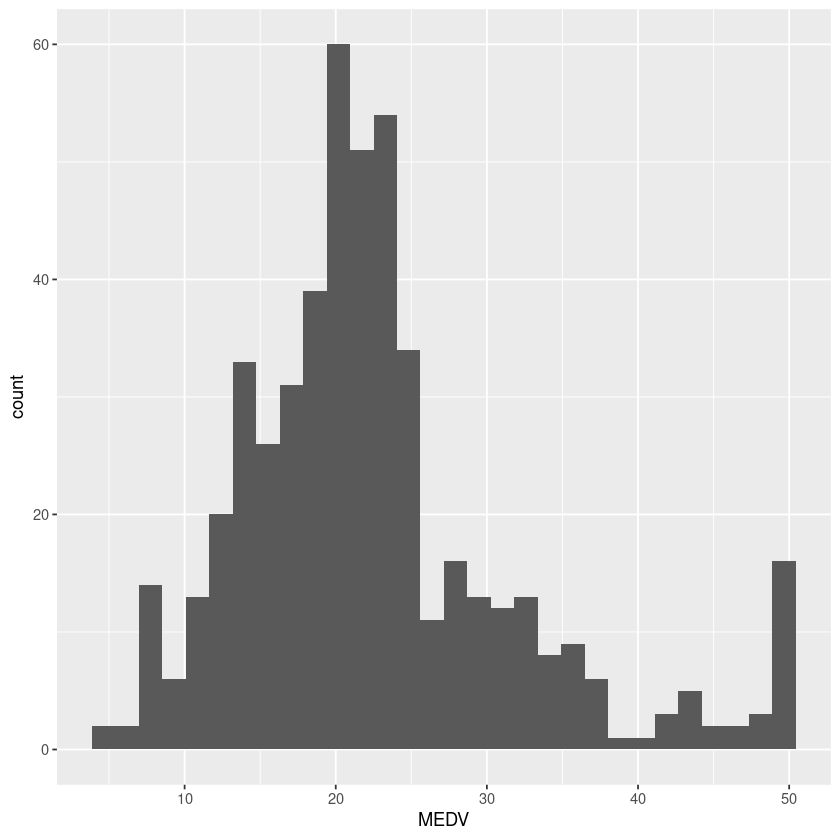

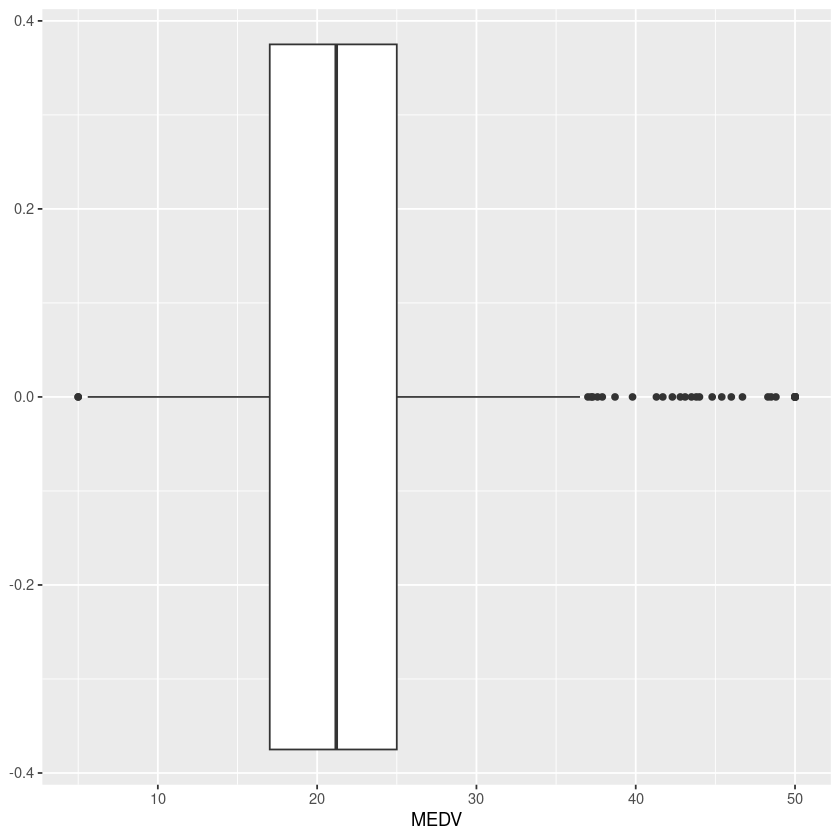

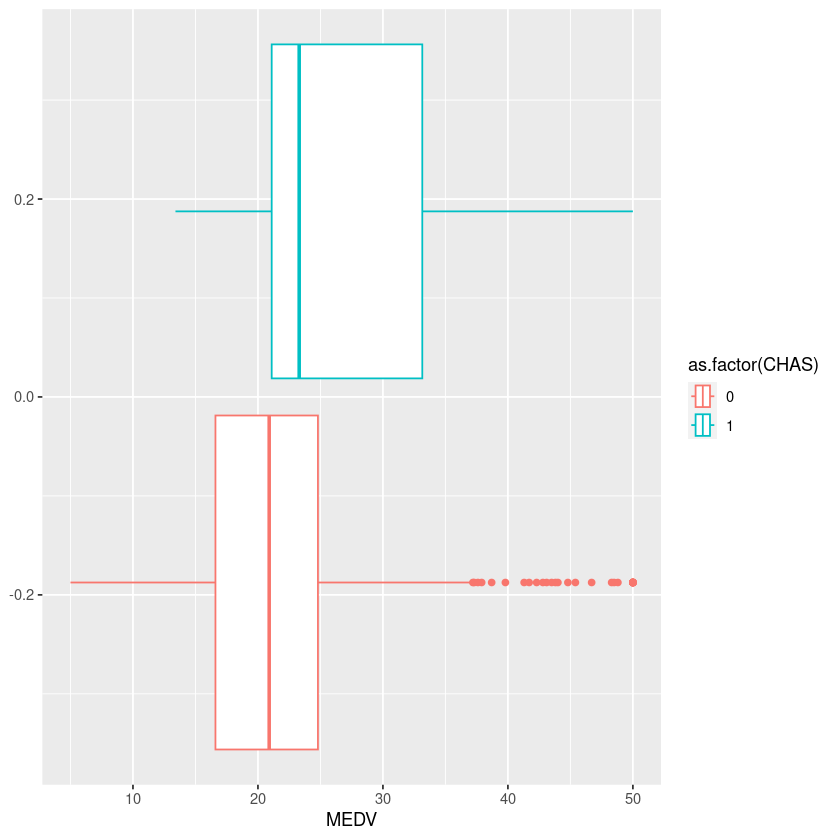

In [4]:
housing=data.table(housing)
str(housing)
options(repr.plot.width=7, repr.plot.height=7)
ggplot(housing, aes(x=MEDV)) + geom_histogram()
ggplot(housing, aes(x=MEDV)) + geom_boxplot()
ggplot(housing, aes(x=MEDV,color=as.factor(CHAS))) + geom_boxplot()

#### Visualizing correlations
The given R code is used for visualizing a correlation matrix of the 'housing' data table. Here's what each line does:

1. **options(repr.plot.width=15, repr.plot.height=12)**: This line sets the default size of the plots that will be generated. The width is set to 15 and the height is set to 12 (typically in inches) for the plot display in the Jupyter notebook.

2. **correl_info=cor(housing)**: This line computes the correlation matrix for the 'housing' data table and assigns it to the variable 'correl_info'. The cor function calculates the pairwise correlation of columns in the data table. It returns a matrix that represents the correlation between each pair of variables in the data.

3. **ggcorrplot(correl_info, hc.order = TRUE, type = "lower", lab = TRUE)**: This line uses the ggcorrplot function from the 'ggcorrplot' package to visualize the correlation matrix.

* correl_info: The first argument is the correlation matrix to be visualized.

* hc.order = TRUE: This argument tells the function to order the variables using hierarchical clustering. Hierarchical clustering groups similar variables together based on the correlation values, which can help in understanding the structure of the data.

* type = "lower": This argument specifies that only the lower triangle of the correlation matrix should be plotted. Since the correlation matrix is symmetrical, only one half is needed to see all the correlations.

* lab = TRUE: This argument specifies that the correlation coefficients should be printed on the plot.

In the resulting plot, each cell in the grid represents the correlation between two variables, with the color indicating the strength and direction of the correlation. Since the labels are added, the correlation coefficient is printed inside the corresponding cell.

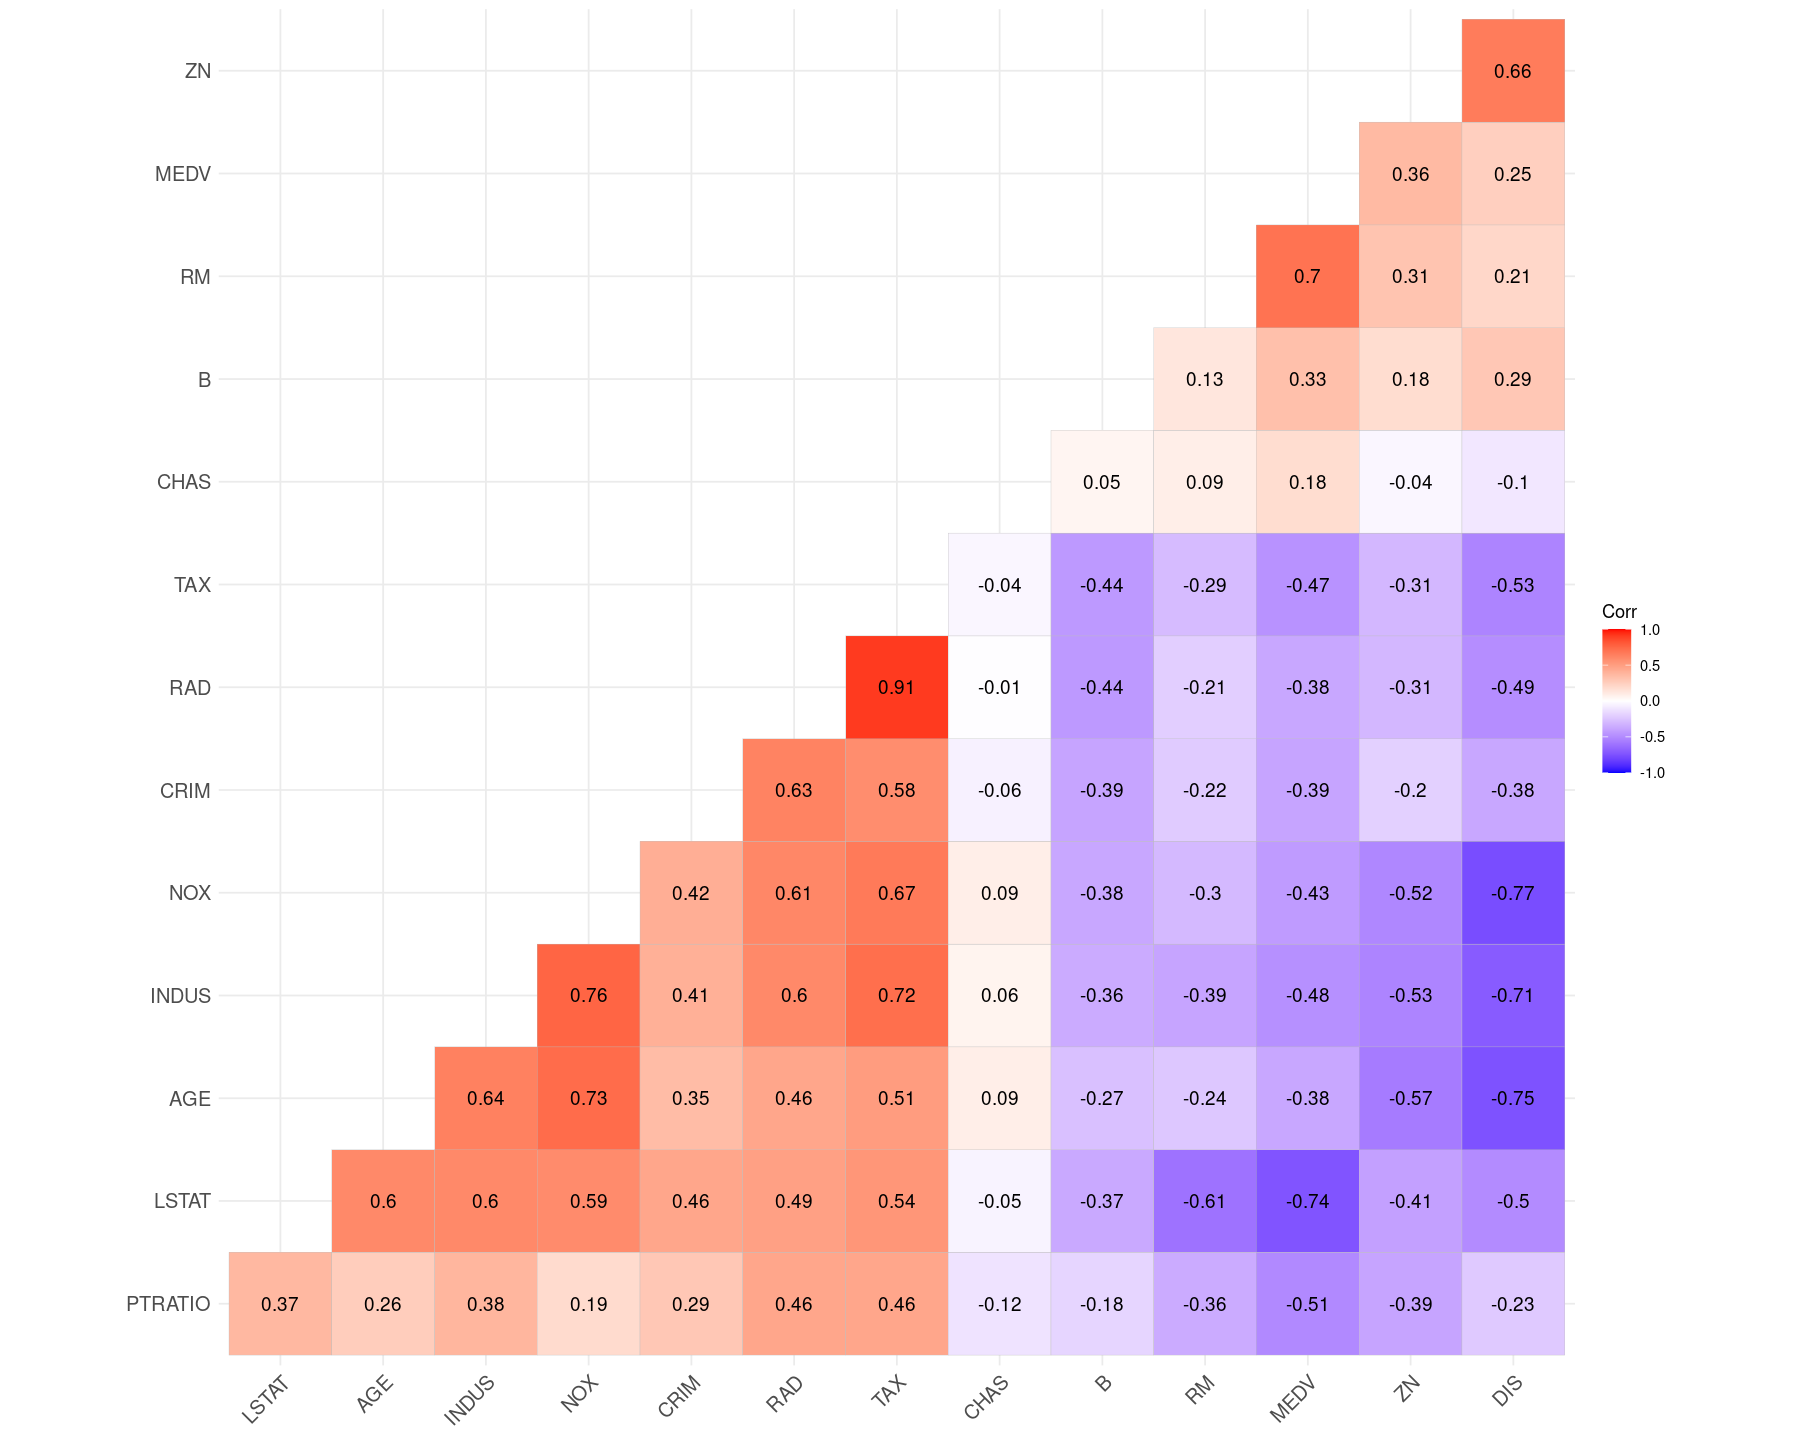

In [5]:
options(repr.plot.width=15, repr.plot.height=12)
correl_info=cor(housing)
ggcorrplot(correl_info, 
           hc.order = TRUE, 
           type = "lower",
           lab = TRUE)


#### An alternative visualization of correlations
The given R code is for creating a matrix of scatterplots, which is useful for visualizing pairwise relationships and distributions in the dataset.

1. **options(repr.plot.width=15, repr.plot.height=15)**: This line sets the default size of the plots to be generated. The width and height are both set to 15 (typically in inches) for the plot display in the Jupyter notebook.

2. **ggpairs(housing)**: This line creates a matrix of scatterplots of all combinations of variables in the 'housing' data table. ggpairs is a function from the 'GGally' package, which extends 'ggplot2' by adding several functions to reduce the complexity of combining geometric objects with transformed data.

The ggpairs function is a powerful tool for quickly visualizing relationships between pairs of variables. Along the diagonal of the plot, it displays a histogram or density plot to show the distribution of each variable. Above the diagonal, it displays scatterplots to show the relationship between each pair of variables. Below the diagonal, it displays the correlation coefficient or a smoothed line to summarize the relationship.

Note that if a dataset contains a large number of variables, the resulting plot could be quite complex and may require a large amount of space to display properly, hence the large plot size specified with the options function.

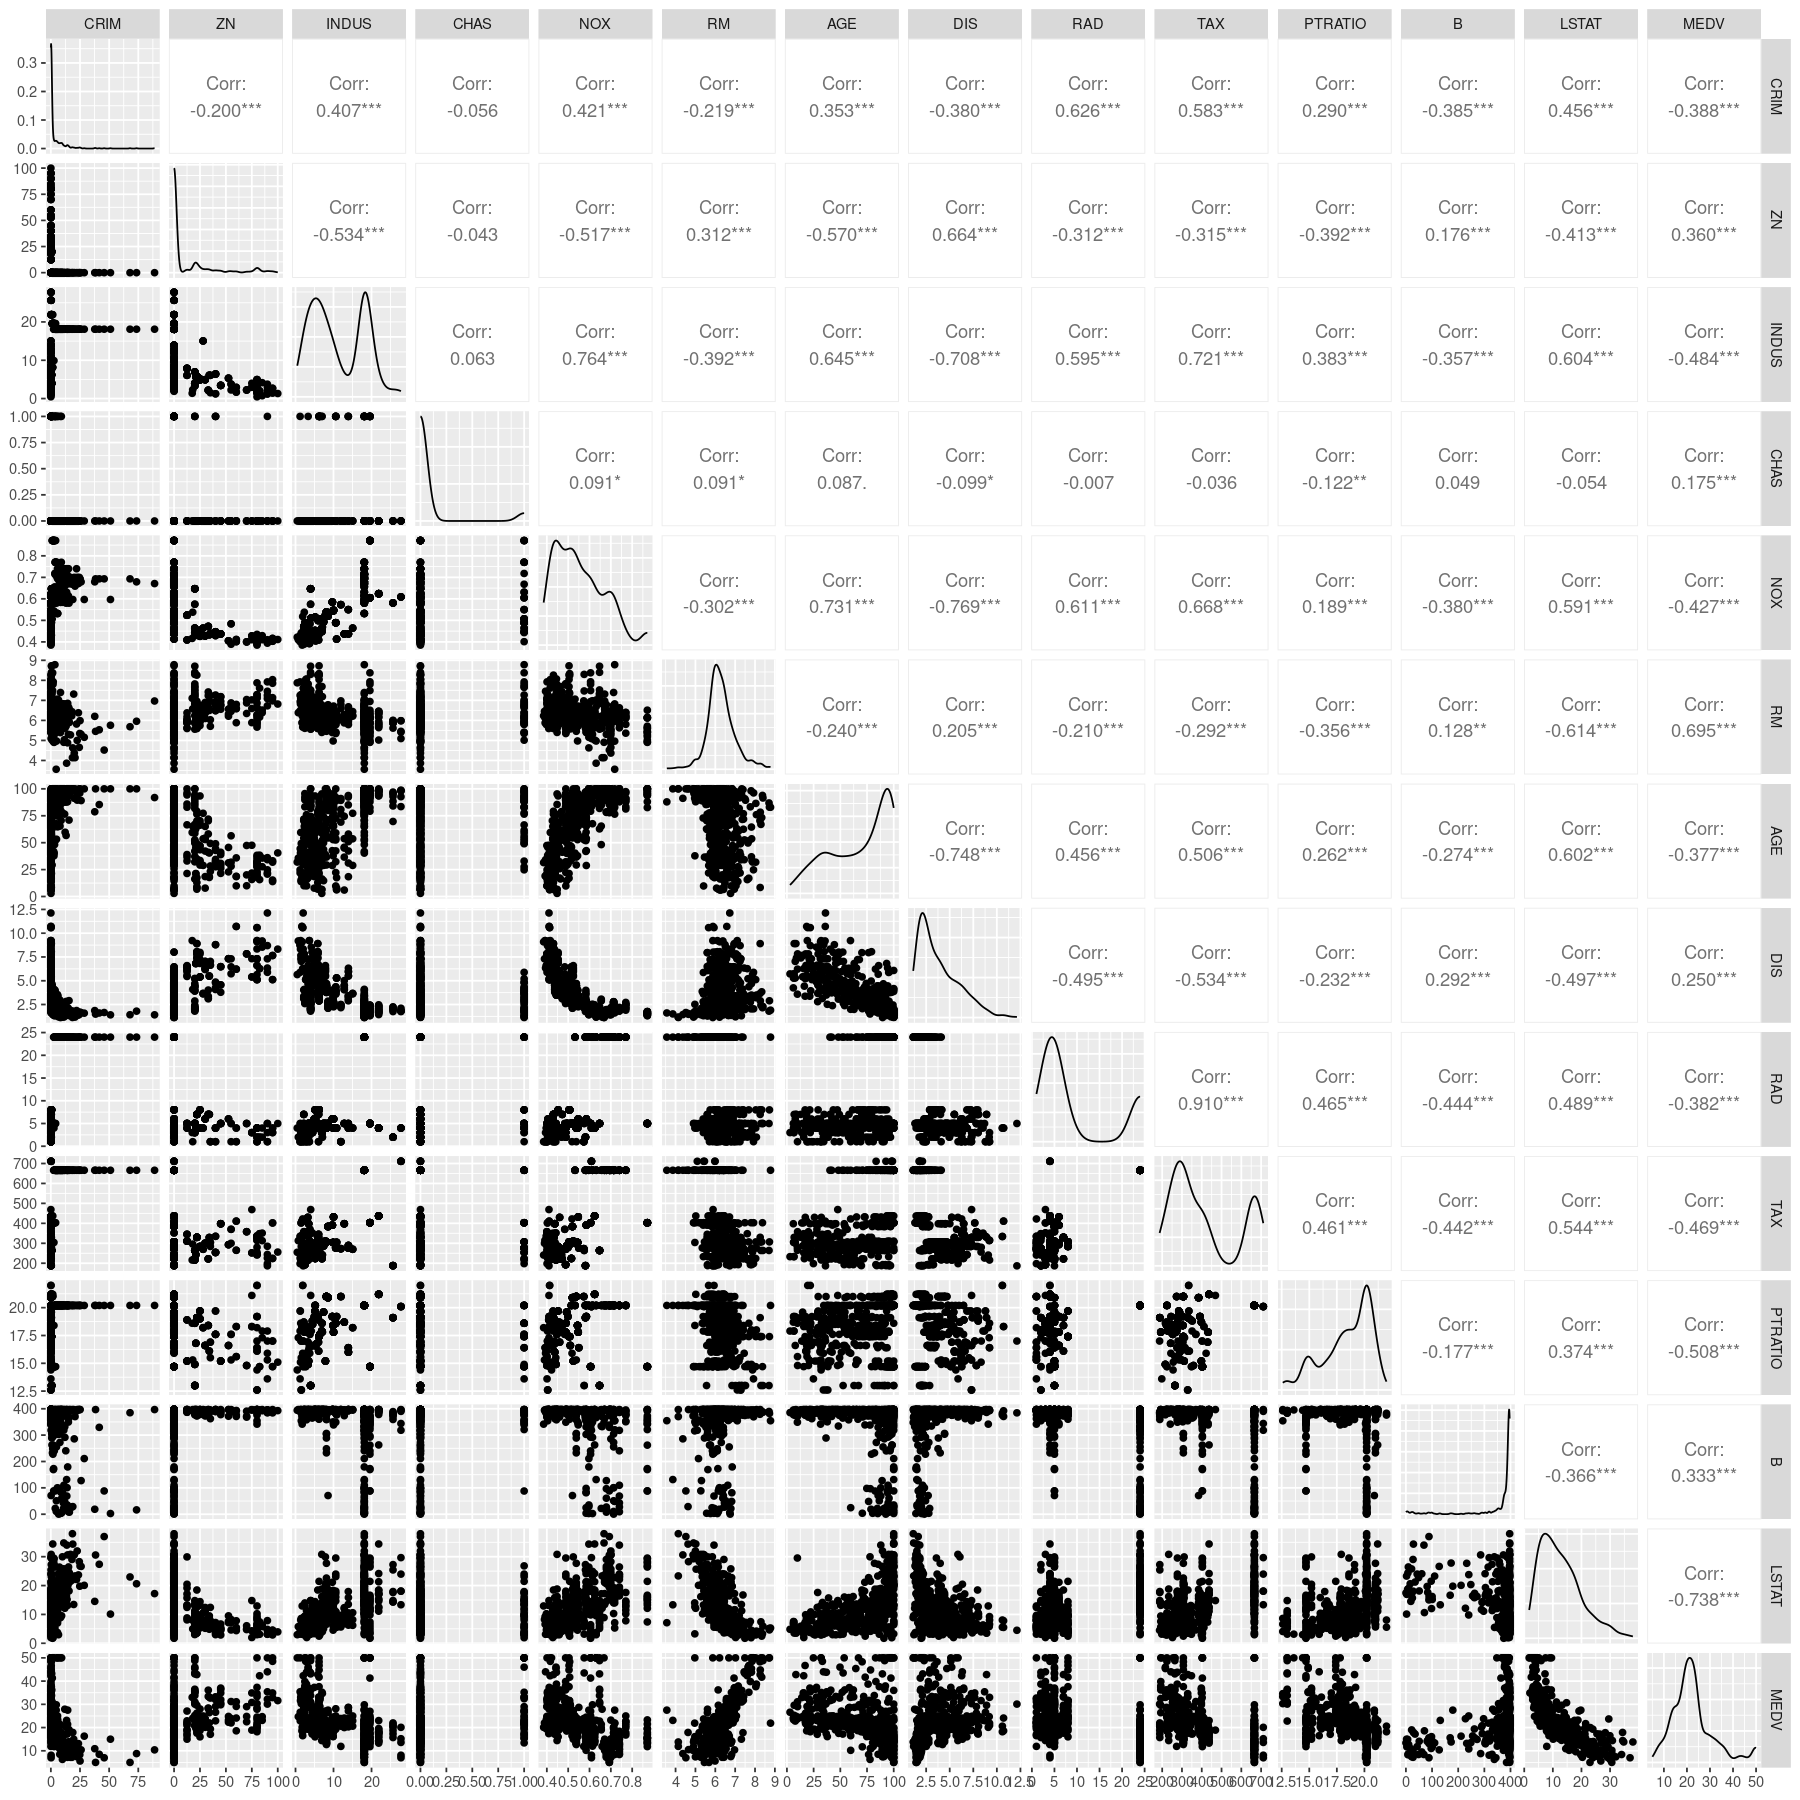

In [6]:
options(repr.plot.width=15, repr.plot.height=15)
ggpairs(housing)

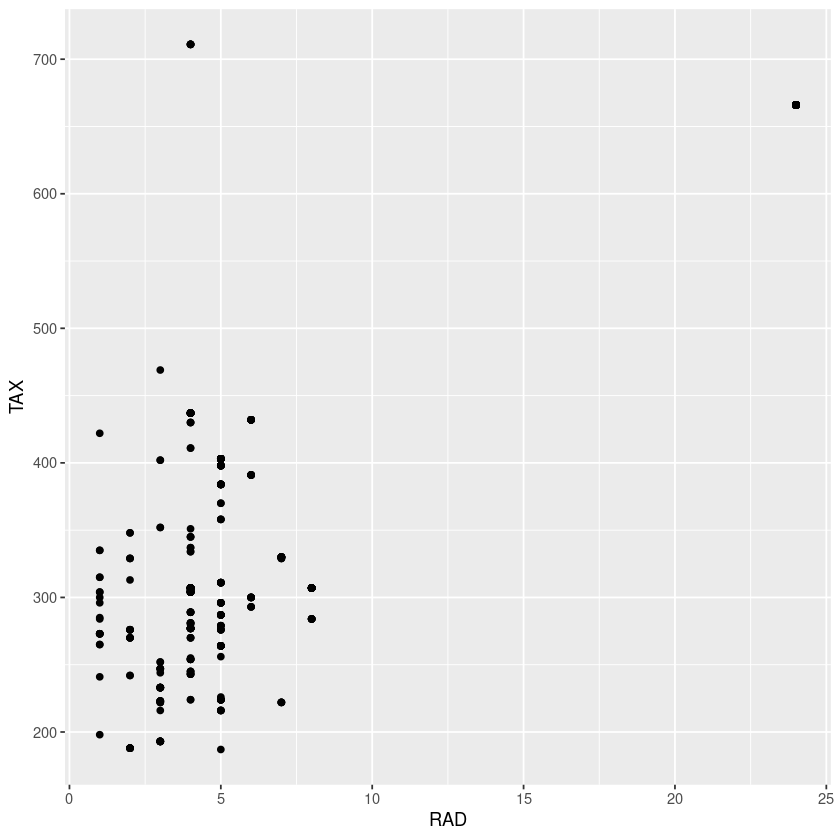

In [7]:
# Focusing on a specific variable pair
options(repr.plot.width=7, repr.plot.height=7)
ggplot(housing, aes(x=RAD,y=TAX)) + geom_point()

### Multiple Linear Regression with "lm"

In [8]:
l_fit = lm(MEDV~.,data=housing)
print(l_fit)
summary(l_fit)
anova(l_fit)


Call:
lm(formula = MEDV ~ ., data = housing)

Coefficients:
(Intercept)         CRIM           ZN        INDUS         CHAS          NOX  
  3.646e+01   -1.080e-01    4.642e-02    2.056e-02    2.687e+00   -1.777e+01  
         RM          AGE          DIS          RAD          TAX      PTRATIO  
  3.810e+00    6.922e-04   -1.476e+00    3.060e-01   -1.233e-02   -9.527e-01  
          B        LSTAT  
  9.312e-03   -5.248e-01  




Call:
lm(formula = MEDV ~ ., data = housing)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
CRIM        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
ZN           4.642e-02  1.373e-02   3.382 0.000778 ***
INDUS        2.056e-02  6.150e-02   0.334 0.738288    
CHAS         2.687e+00  8.616e-01   3.118 0.001925 ** 
NOX         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
RM           3.810e+00  4.179e-01   9.116  < 2e-16 ***
AGE          6.922e-04  1.321e-02   0.052 0.958229    
DIS         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
RAD          3.060e-01  6.635e-02   4.613 5.07e-06 ***
TAX         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
PTRATIO     -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
B            9.312e-03  2.686e-03   3.467 0.000573 ***
LSTAT       -5.248e-01  5.072e-02 -10.347  < 2e-16 ***
---
Signif. codes:  

Df  Sum Sq      Mean Sq     F value    Pr(>F)      
CRIM        1  6440.78306  6440.78306 286.030046 6.454140e-51
ZN          1  3554.33620  3554.33620 157.845240 1.356741e-31
INDUS       1  2551.23644  2551.23644 113.298378 5.953713e-24
CHAS        1  1529.84788  1529.84788  67.939326 1.542886e-15
NOX         1    76.24765    76.24765   3.386097 6.635054e-02
RM          1 10938.11661 10938.11661 485.753048 2.156727e-75
AGE         1    90.26791    90.26791   4.008726 4.581372e-02
DIS         1  1779.50111  1779.50111  79.026227 1.163840e-17
RAD         1    34.13432    34.13432   1.515878 2.188325e-01
TAX         1   329.55407   329.55407  14.635234 1.472406e-04
PTRATIO     1  1309.30934  1309.30934  58.145385 1.266278e-13
B           1   593.33756   593.33756  26.349649 4.109280e-07
LSTAT       1  2410.83869  2410.83869 107.063426 7.776912e-23
Residuals 492 11078.78458    22.51785         NA           NA

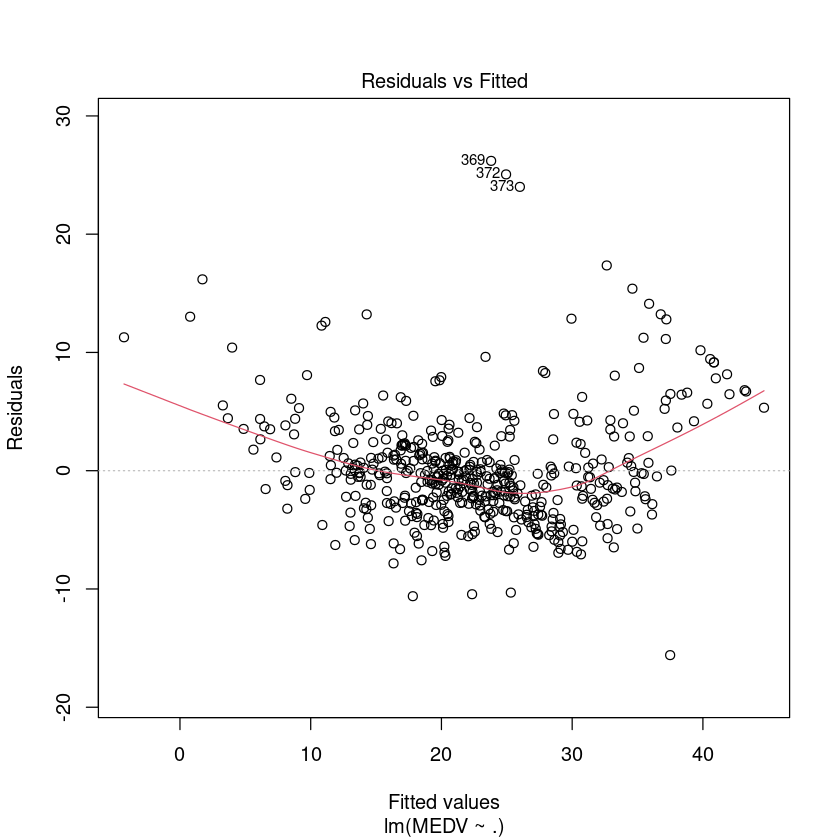

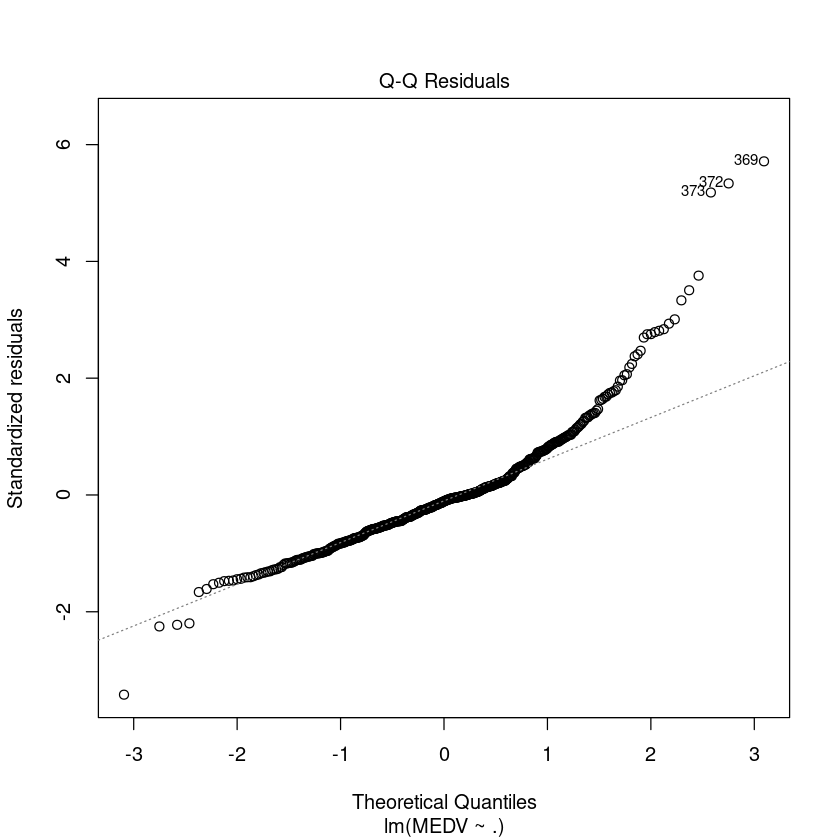

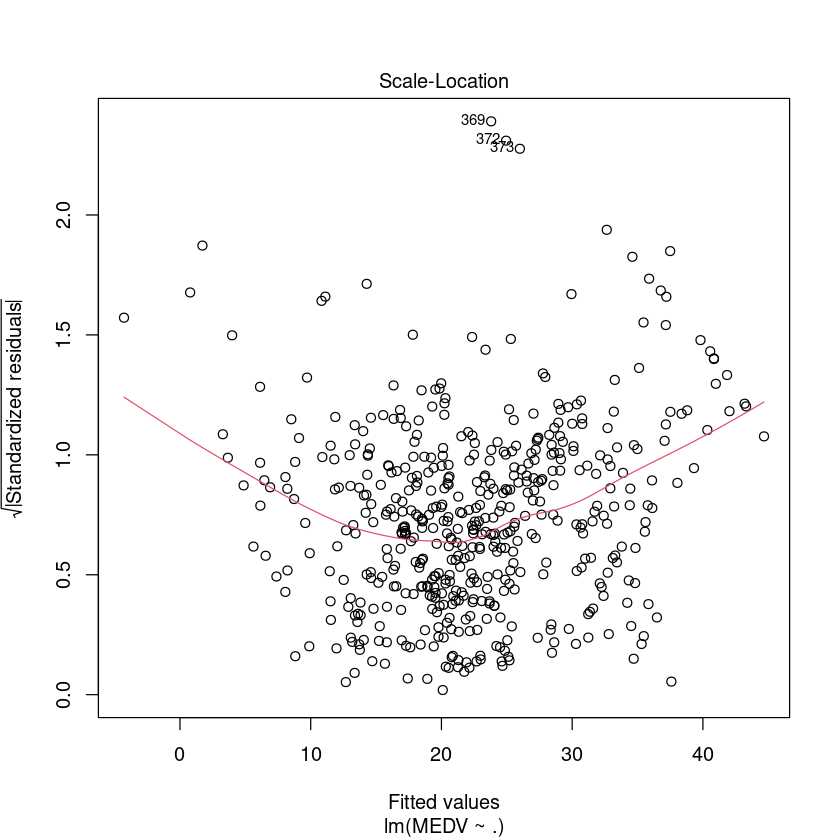

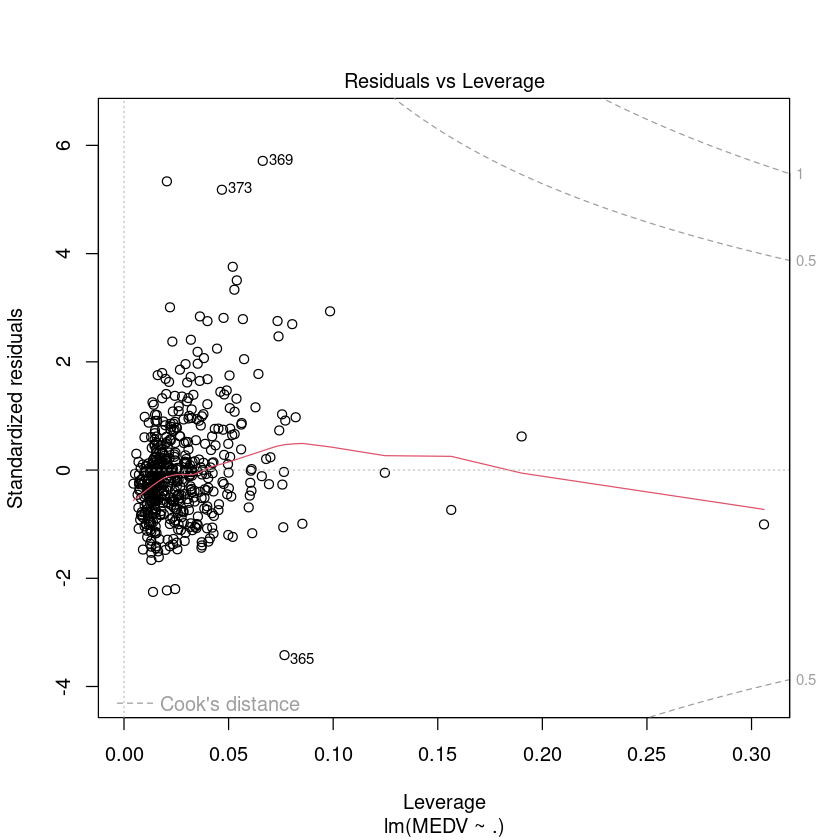

In [9]:
options(repr.plot.width=7, repr.plot.height=7)
plot(l_fit)

In [10]:
#Building models without the intercept
l_fit_no_intercept = lm(MEDV~-1+.,data=housing)
summary(l_fit_no_intercept)


Call:
lm(formula = MEDV ~ -1 + ., data = housing)

Residuals:
     Min       1Q   Median       3Q      Max 
-21.1100  -2.5630  -0.5529   1.6546  30.7254 

Coefficients:
         Estimate Std. Error t value Pr(>|t|)    
CRIM    -0.092897   0.034421  -2.699 0.007197 ** 
ZN       0.048715   0.014403   3.382 0.000776 ***
INDUS   -0.004060   0.064440  -0.063 0.949789    
CHAS     2.853999   0.903913   3.157 0.001689 ** 
NOX     -2.868436   3.358732  -0.854 0.393507    
RM       5.928148   0.309109  19.178  < 2e-16 ***
AGE     -0.007269   0.013815  -0.526 0.598979    
DIS     -0.968514   0.195630  -4.951 1.02e-06 ***
RAD      0.171151   0.066752   2.564 0.010644 *  
TAX     -0.009396   0.003923  -2.395 0.016988 *  
PTRATIO -0.392191   0.109869  -3.570 0.000393 ***
B        0.014906   0.002697   5.528 5.27e-08 ***
LSTAT   -0.416304   0.050786  -8.197 2.14e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.98 on 493 degrees of freedom
Multip

In [11]:
# adding nonlinear features
nlin_housing=copy(housing)
# note that this is data.table data structure notation from data.table package
nlin_housing[,lstat_sq:=LSTAT^2] 
# nlin_housing$lstat_sq = nlin_housing$LSTAT^2 is the same
l_fit_nonlinear = lm(MEDV~.,data=nlin_housing)
summary(l_fit_nonlinear)


Call:
lm(formula = MEDV ~ ., data = nlin_housing)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.2282  -2.4793  -0.3538   1.8270  24.4107 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  43.581458   4.651116   9.370  < 2e-16 ***
CRIM         -0.150565   0.029909  -5.034 6.75e-07 ***
ZN            0.024663   0.012548   1.965  0.04992 *  
INDUS         0.045740   0.055515   0.824  0.41039    
CHAS          2.421636   0.777481   3.115  0.00195 ** 
NOX         -16.284075   3.447939  -4.723 3.04e-06 ***
RM            3.043719   0.383719   7.932 1.47e-14 ***
AGE           0.028707   0.012200   2.353  0.01902 *  
DIS          -1.192984   0.181834  -6.561 1.36e-10 ***
RAD           0.294976   0.059849   4.929 1.13e-06 ***
TAX          -0.010900   0.003394  -3.211  0.00141 ** 
PTRATIO      -0.817451   0.118676  -6.888 1.74e-11 ***
B             0.007809   0.002427   3.218  0.00138 ** 
LSTAT        -1.771125   0.125465 -14.117  < 2e-16 ***
lstat


Call:
lm(formula = MEDV ~ lstat_sq + LSTAT, data = nlin_housing)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.2834  -3.8313  -0.5295   2.3095  25.4148 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 42.862007   0.872084   49.15   <2e-16 ***
lstat_sq     0.043547   0.003745   11.63   <2e-16 ***
LSTAT       -2.332821   0.123803  -18.84   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.524 on 503 degrees of freedom
Multiple R-squared:  0.6407,	Adjusted R-squared:  0.6393 
F-statistic: 448.5 on 2 and 503 DF,  p-value: < 2.2e-16


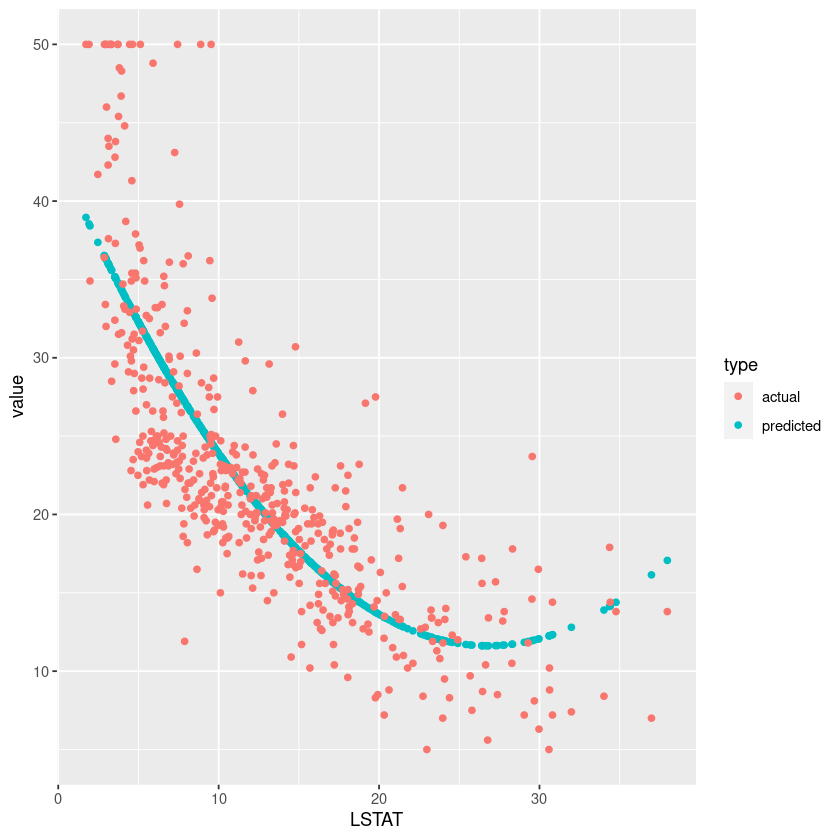

In [12]:
# if we have only LSTAT variable it is basically learning a polynomial model of degree 2
nlin_housing=copy(housing)
nlin_housing[,lstat_sq:=LSTAT^2]
l_fit_nonlinear = lm(MEDV~lstat_sq+LSTAT,data=nlin_housing)
summary(l_fit_nonlinear)

options(repr.plot.width=7, repr.plot.height=7)
#### naive R plots ####
#plot(nlin_housing$LSTAT,predict(l_fit_nonlinear,nlin_housing))
#points(nlin_housing$LSTAT,nlin_housing$MEDV,col='red')
#### ggplot ####
dt_plot_copy = copy(housing) # creating new data frame to keep original
dt_plot_copy[,value:=predict(l_fit_nonlinear,nlin_housing)]
dt_plot_copy[,type:='predicted'] # for plotting purposes
dt_plot_actual = copy(housing) # creating another copy of the data frame
dt_plot_actual[,value:=MEDV]
dt_plot_actual[,type:='actual']
dt_final_plot = rbind(dt_plot_copy,dt_plot_actual) # binding them together
ggplot(dt_final_plot, aes(x=LSTAT,y=value,color=type)) + geom_point()


Call:
lm(formula = MEDV ~ lstat_higherpiece + lstat_lowerpiece, data = nlin_housing)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.6086  -4.2556  -0.9048   2.3587  24.4548 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       36.88508    0.61333   60.14   <2e-16 ***
lstat_higherpiece -0.83666    0.03955  -21.16   <2e-16 ***
lstat_lowerpiece  -1.18991    0.04819  -24.69   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.887 on 503 degrees of freedom
Multiple R-squared:  0.5919,	Adjusted R-squared:  0.5903 
F-statistic: 364.8 on 2 and 503 DF,  p-value: < 2.2e-16


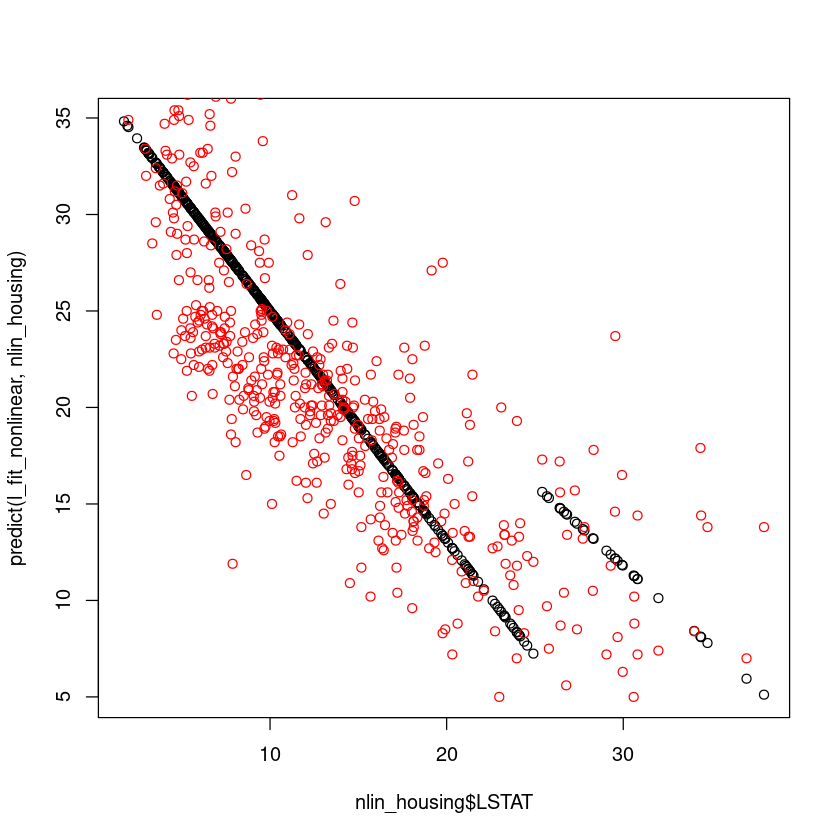

In [13]:
# piecewise linear modeling as an alternative
nlin_housing=copy(housing)
nlin_housing[,lstat_higherpiece:=ifelse(LSTAT>25,LSTAT,0)]
nlin_housing[,lstat_lowerpiece:=ifelse(LSTAT<=25,LSTAT,0)]
l_fit_nonlinear = lm(MEDV~lstat_higherpiece+lstat_lowerpiece,data=nlin_housing)
summary(l_fit_nonlinear)
             
plot(nlin_housing$LSTAT,predict(l_fit_nonlinear,nlin_housing))           
points(nlin_housing$LSTAT,nlin_housing$MEDV,col='red')

In [14]:
# a logarithmic transformation
nlin_housing=copy(housing)
nlin_housing[,lstat_log:=log(LSTAT)]
l_fit_nonlinear_log = lm(MEDV~.,data=nlin_housing)
summary(l_fit_nonlinear_log)


Call:
lm(formula = MEDV ~ ., data = nlin_housing)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.9086  -2.5787  -0.2832   1.7727  25.6645 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  59.492931   4.888999  12.169  < 2e-16 ***
CRIM         -0.149151   0.029147  -5.117 4.46e-07 ***
ZN            0.013536   0.012398   1.092 0.275449    
INDUS         0.001986   0.054181   0.037 0.970773    
CHAS          2.048368   0.760654   2.693 0.007325 ** 
NOX         -16.243592   3.366406  -4.825 1.87e-06 ***
RM            2.436479   0.385523   6.320 5.88e-10 ***
AGE           0.025693   0.011820   2.174 0.030202 *  
DIS          -1.158469   0.177643  -6.521 1.73e-10 ***
RAD           0.293448   0.058440   5.021 7.19e-07 ***
TAX          -0.010838   0.003314  -3.270 0.001151 ** 
PTRATIO      -0.839916   0.115602  -7.266 1.47e-12 ***
B             0.008098   0.002368   3.420 0.000678 ***
LSTAT         0.345845   0.085339   4.053 5.89e-05 ***
lstat

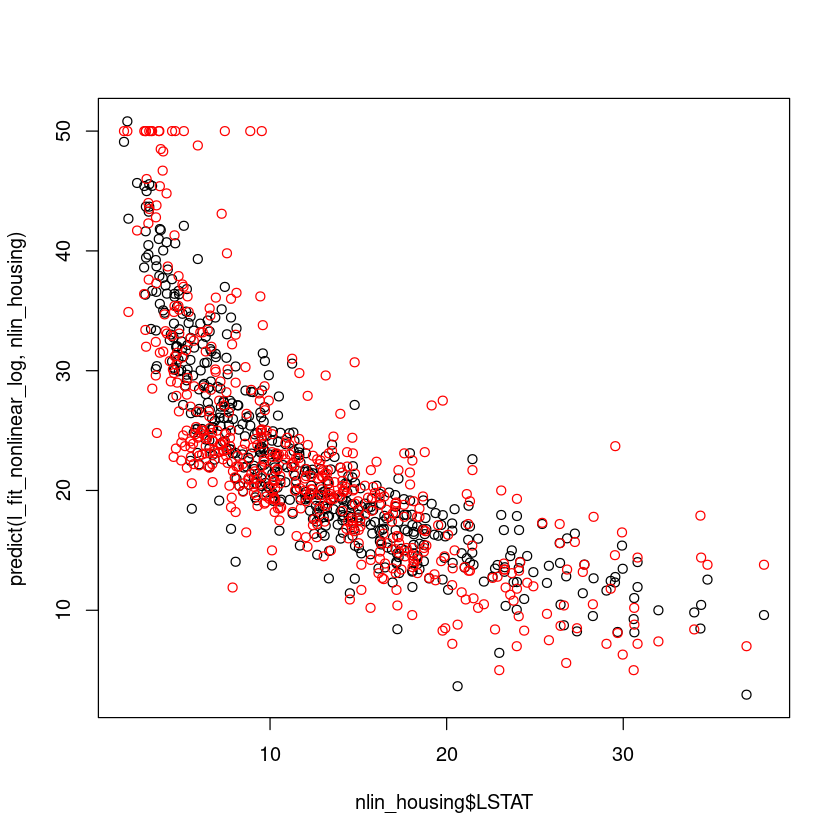

In [15]:
plot(nlin_housing$LSTAT,predict(l_fit_nonlinear_log,nlin_housing))
points(nlin_housing$LSTAT,nlin_housing$MEDV,col='red')


Call:
lm(formula = MEDV ~ LSTAT + lstat_log, data = nlin_housing)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.9528  -3.4056  -0.5633   2.4057  26.7037 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  57.43062    1.68115   34.16  < 2e-16 ***
LSTAT         0.38044    0.09933    3.83 0.000144 ***
lstat_log   -16.74910    1.18049  -14.19  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.258 on 503 degrees of freedom
Multiple R-squared:  0.6744,	Adjusted R-squared:  0.6731 
F-statistic:   521 on 2 and 503 DF,  p-value: < 2.2e-16


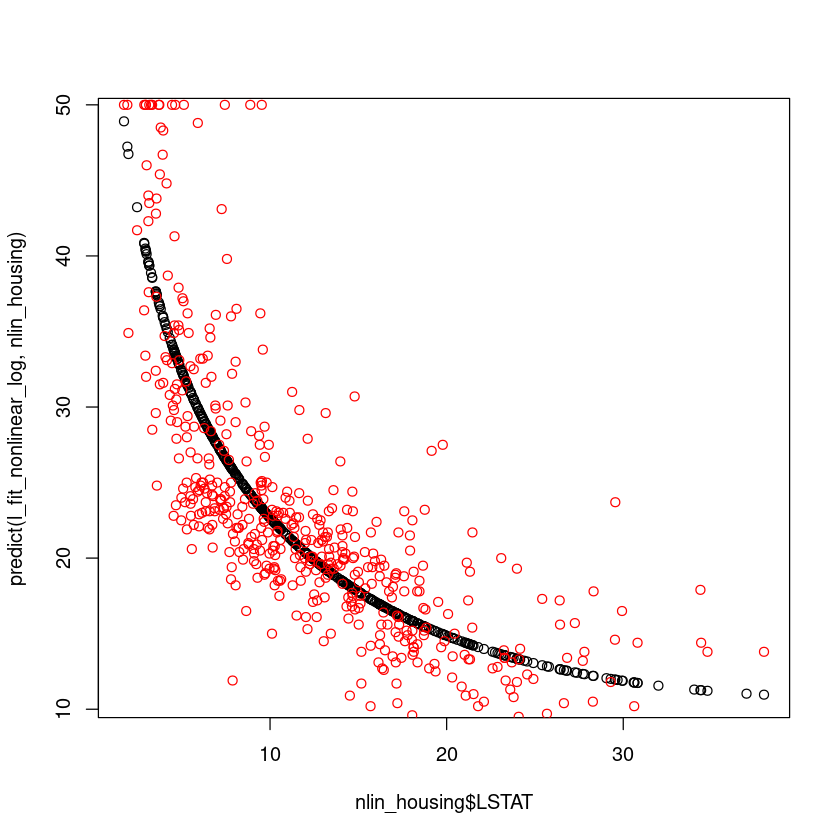

In [16]:
l_fit_nonlinear_log = lm(MEDV~LSTAT+lstat_log,data=nlin_housing)
summary(l_fit_nonlinear_log)

plot(nlin_housing$LSTAT,predict(l_fit_nonlinear_log,nlin_housing))
points(nlin_housing$LSTAT,nlin_housing$MEDV,col='red')

In [17]:
nlin_housing=copy(housing)
nlin_housing[,lstat_log:=log(LSTAT)]
l_fit_nonlinear = lm(MEDV~.,data=nlin_housing)

In [18]:
summary(l_fit_nonlinear)


Call:
lm(formula = MEDV ~ ., data = nlin_housing)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.9086  -2.5787  -0.2832   1.7727  25.6645 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  59.492931   4.888999  12.169  < 2e-16 ***
CRIM         -0.149151   0.029147  -5.117 4.46e-07 ***
ZN            0.013536   0.012398   1.092 0.275449    
INDUS         0.001986   0.054181   0.037 0.970773    
CHAS          2.048368   0.760654   2.693 0.007325 ** 
NOX         -16.243592   3.366406  -4.825 1.87e-06 ***
RM            2.436479   0.385523   6.320 5.88e-10 ***
AGE           0.025693   0.011820   2.174 0.030202 *  
DIS          -1.158469   0.177643  -6.521 1.73e-10 ***
RAD           0.293448   0.058440   5.021 7.19e-07 ***
TAX          -0.010838   0.003314  -3.270 0.001151 ** 
PTRATIO      -0.839916   0.115602  -7.266 1.47e-12 ***
B             0.008098   0.002368   3.420 0.000678 ***
LSTAT         0.345845   0.085339   4.053 5.89e-05 ***
lstat

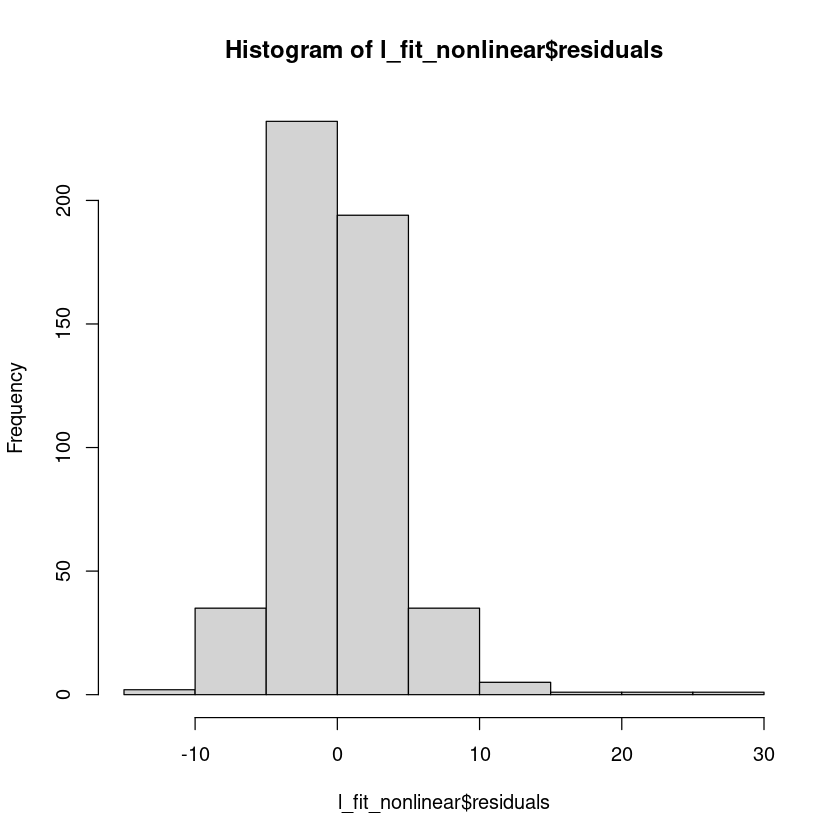

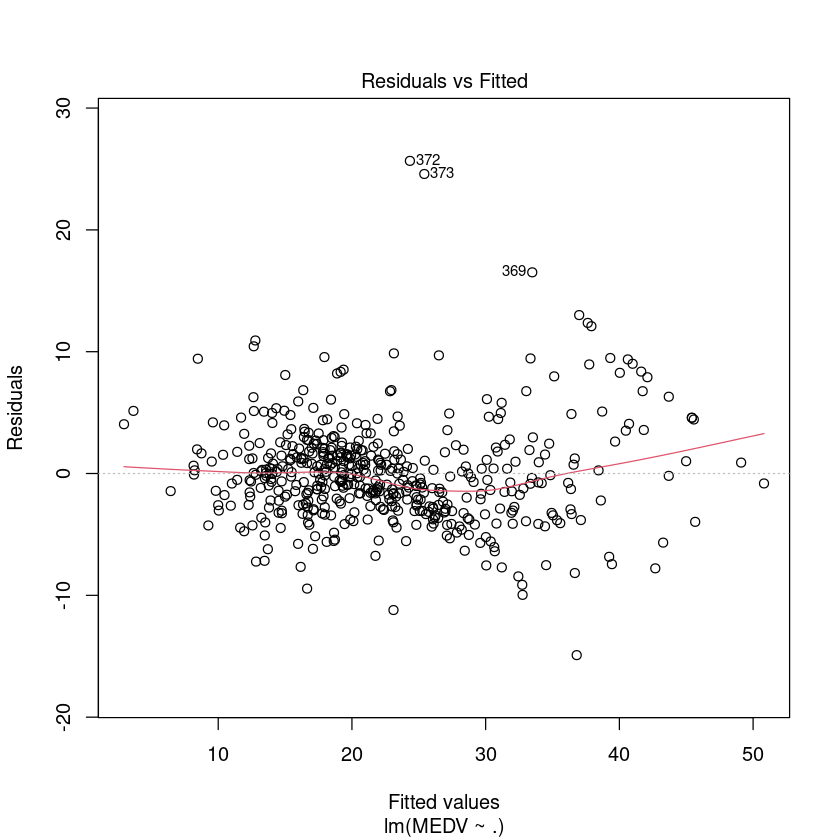

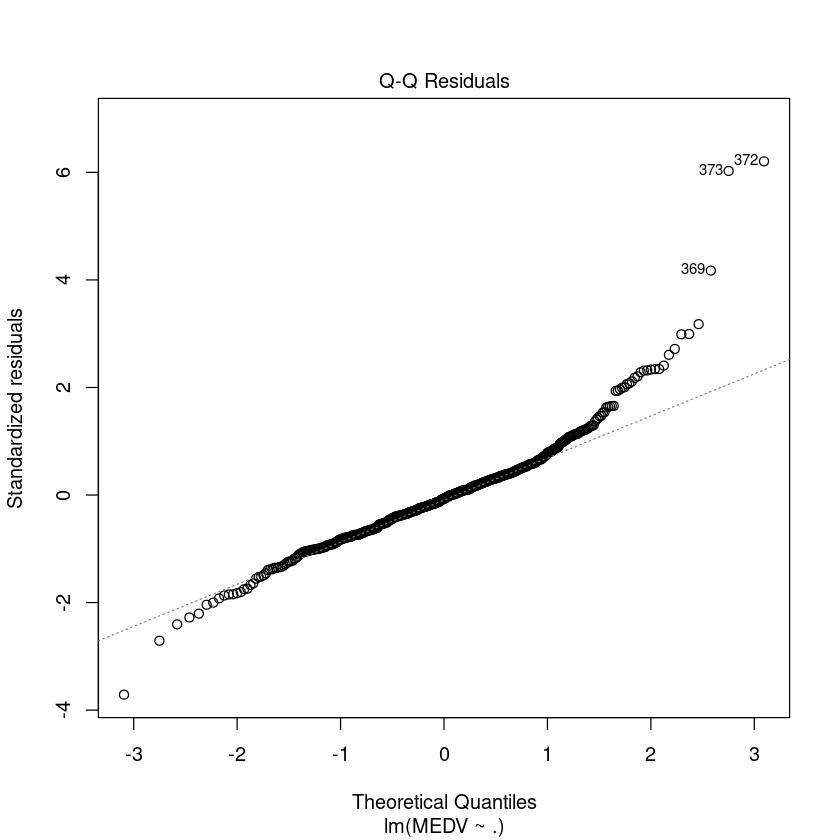

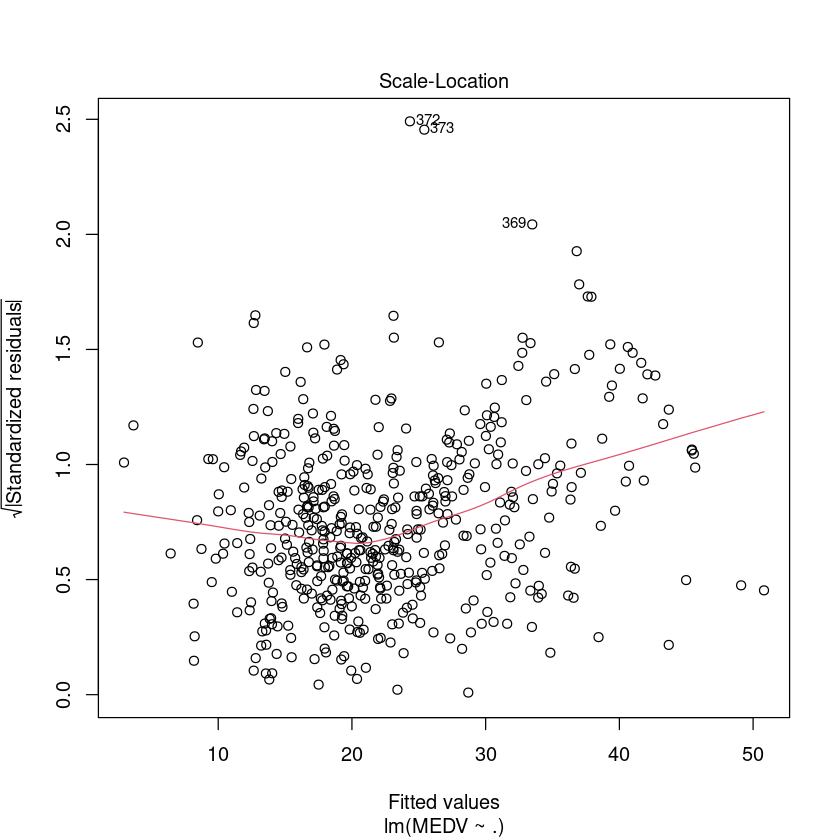

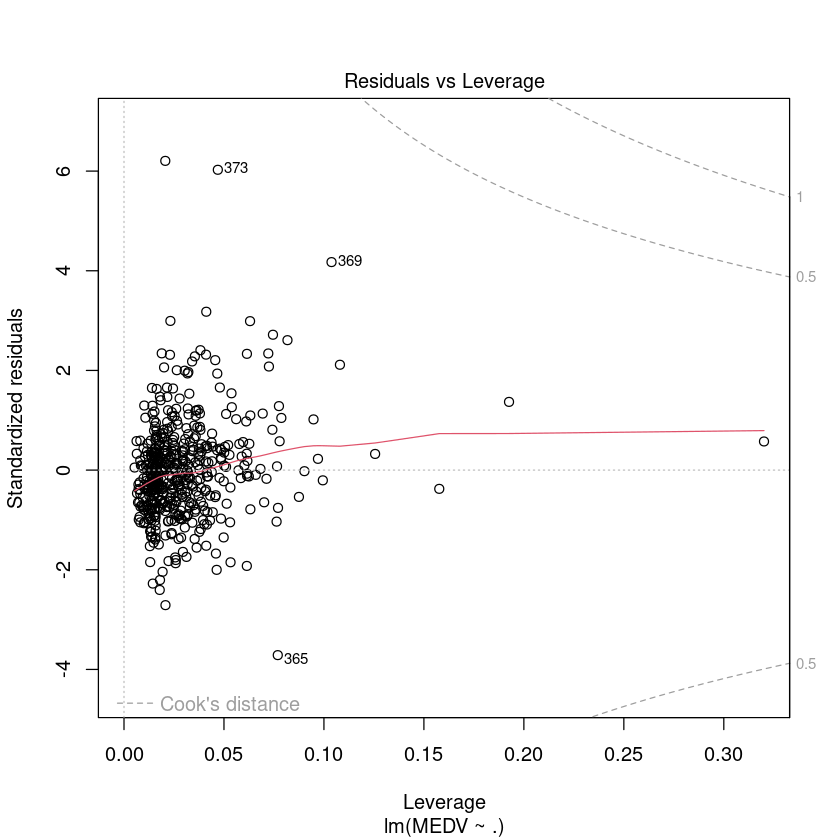

In [19]:
options(repr.plot.width=7, repr.plot.height=7)
hist(l_fit_nonlinear$residuals)
plot(l_fit_nonlinear)

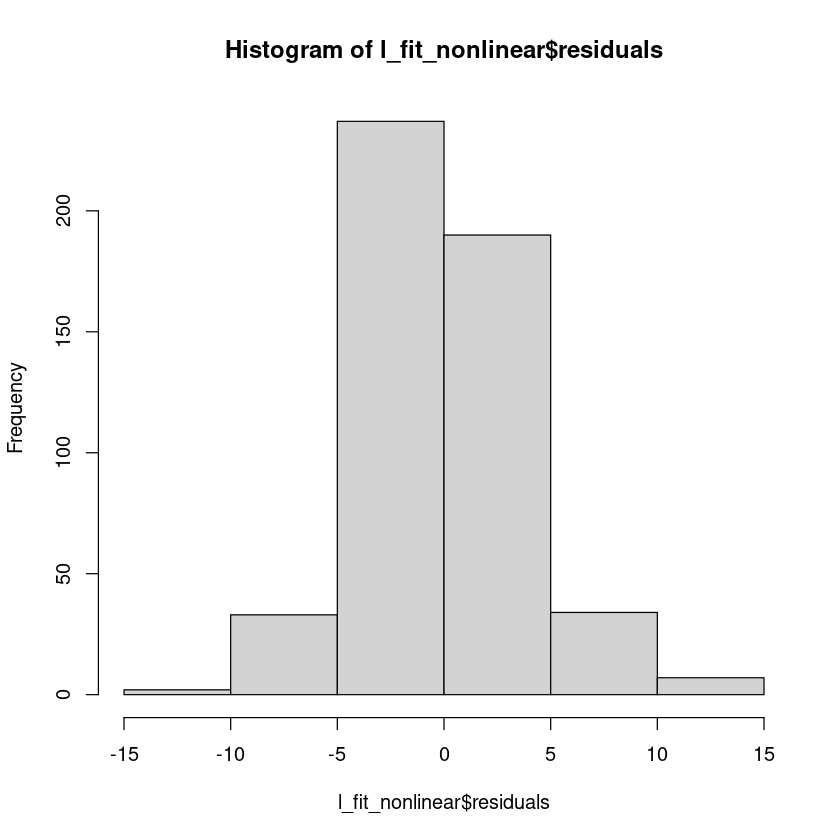

In [20]:
nlin_housing=copy(housing[-c(369,372,373)])
nlin_housing[,lstat_log:=log(LSTAT)]
l_fit_nonlinear = lm(MEDV~.,data=nlin_housing)
hist(l_fit_nonlinear$residuals)

In [21]:
nlin_housing[,predicted:=predict(l_fit_nonlinear,nlin_housing)]
nlin_housing[,residual:=MEDV-predicted]
head(nlin_housing)

CRIM    ZN INDUS CHAS NOX   RM    AGE  DIS    RAD TAX PTRATIO B      LSTAT
1 0.00632 18 2.31  0    0.538 6.575 65.2 4.0900 1   296 15.3    396.90 4.98 
2 0.02731  0 7.07  0    0.469 6.421 78.9 4.9671 2   242 17.8    396.90 9.14 
3 0.02729  0 7.07  0    0.469 7.185 61.1 4.9671 2   242 17.8    392.83 4.03 
4 0.03237  0 2.18  0    0.458 6.998 45.8 6.0622 3   222 18.7    394.63 2.94 
5 0.06905  0 2.18  0    0.458 7.147 54.2 6.0622 3   222 18.7    396.90 5.33 
6 0.02985  0 2.18  0    0.458 6.430 58.7 6.0622 3   222 18.7    394.12 5.21 
  MEDV lstat_log predicted residual    
1 24.0 1.605430  32.03615  -8.036154489
2 21.6 2.212660  24.65606  -3.056063051
3 34.7 1.393766  34.70451  -0.004511136
4 33.4 1.078410  36.00716  -2.607155025
5 36.2 1.673351  30.34806   5.851943702
6 28.7 1.650580  28.36096   0.339035667

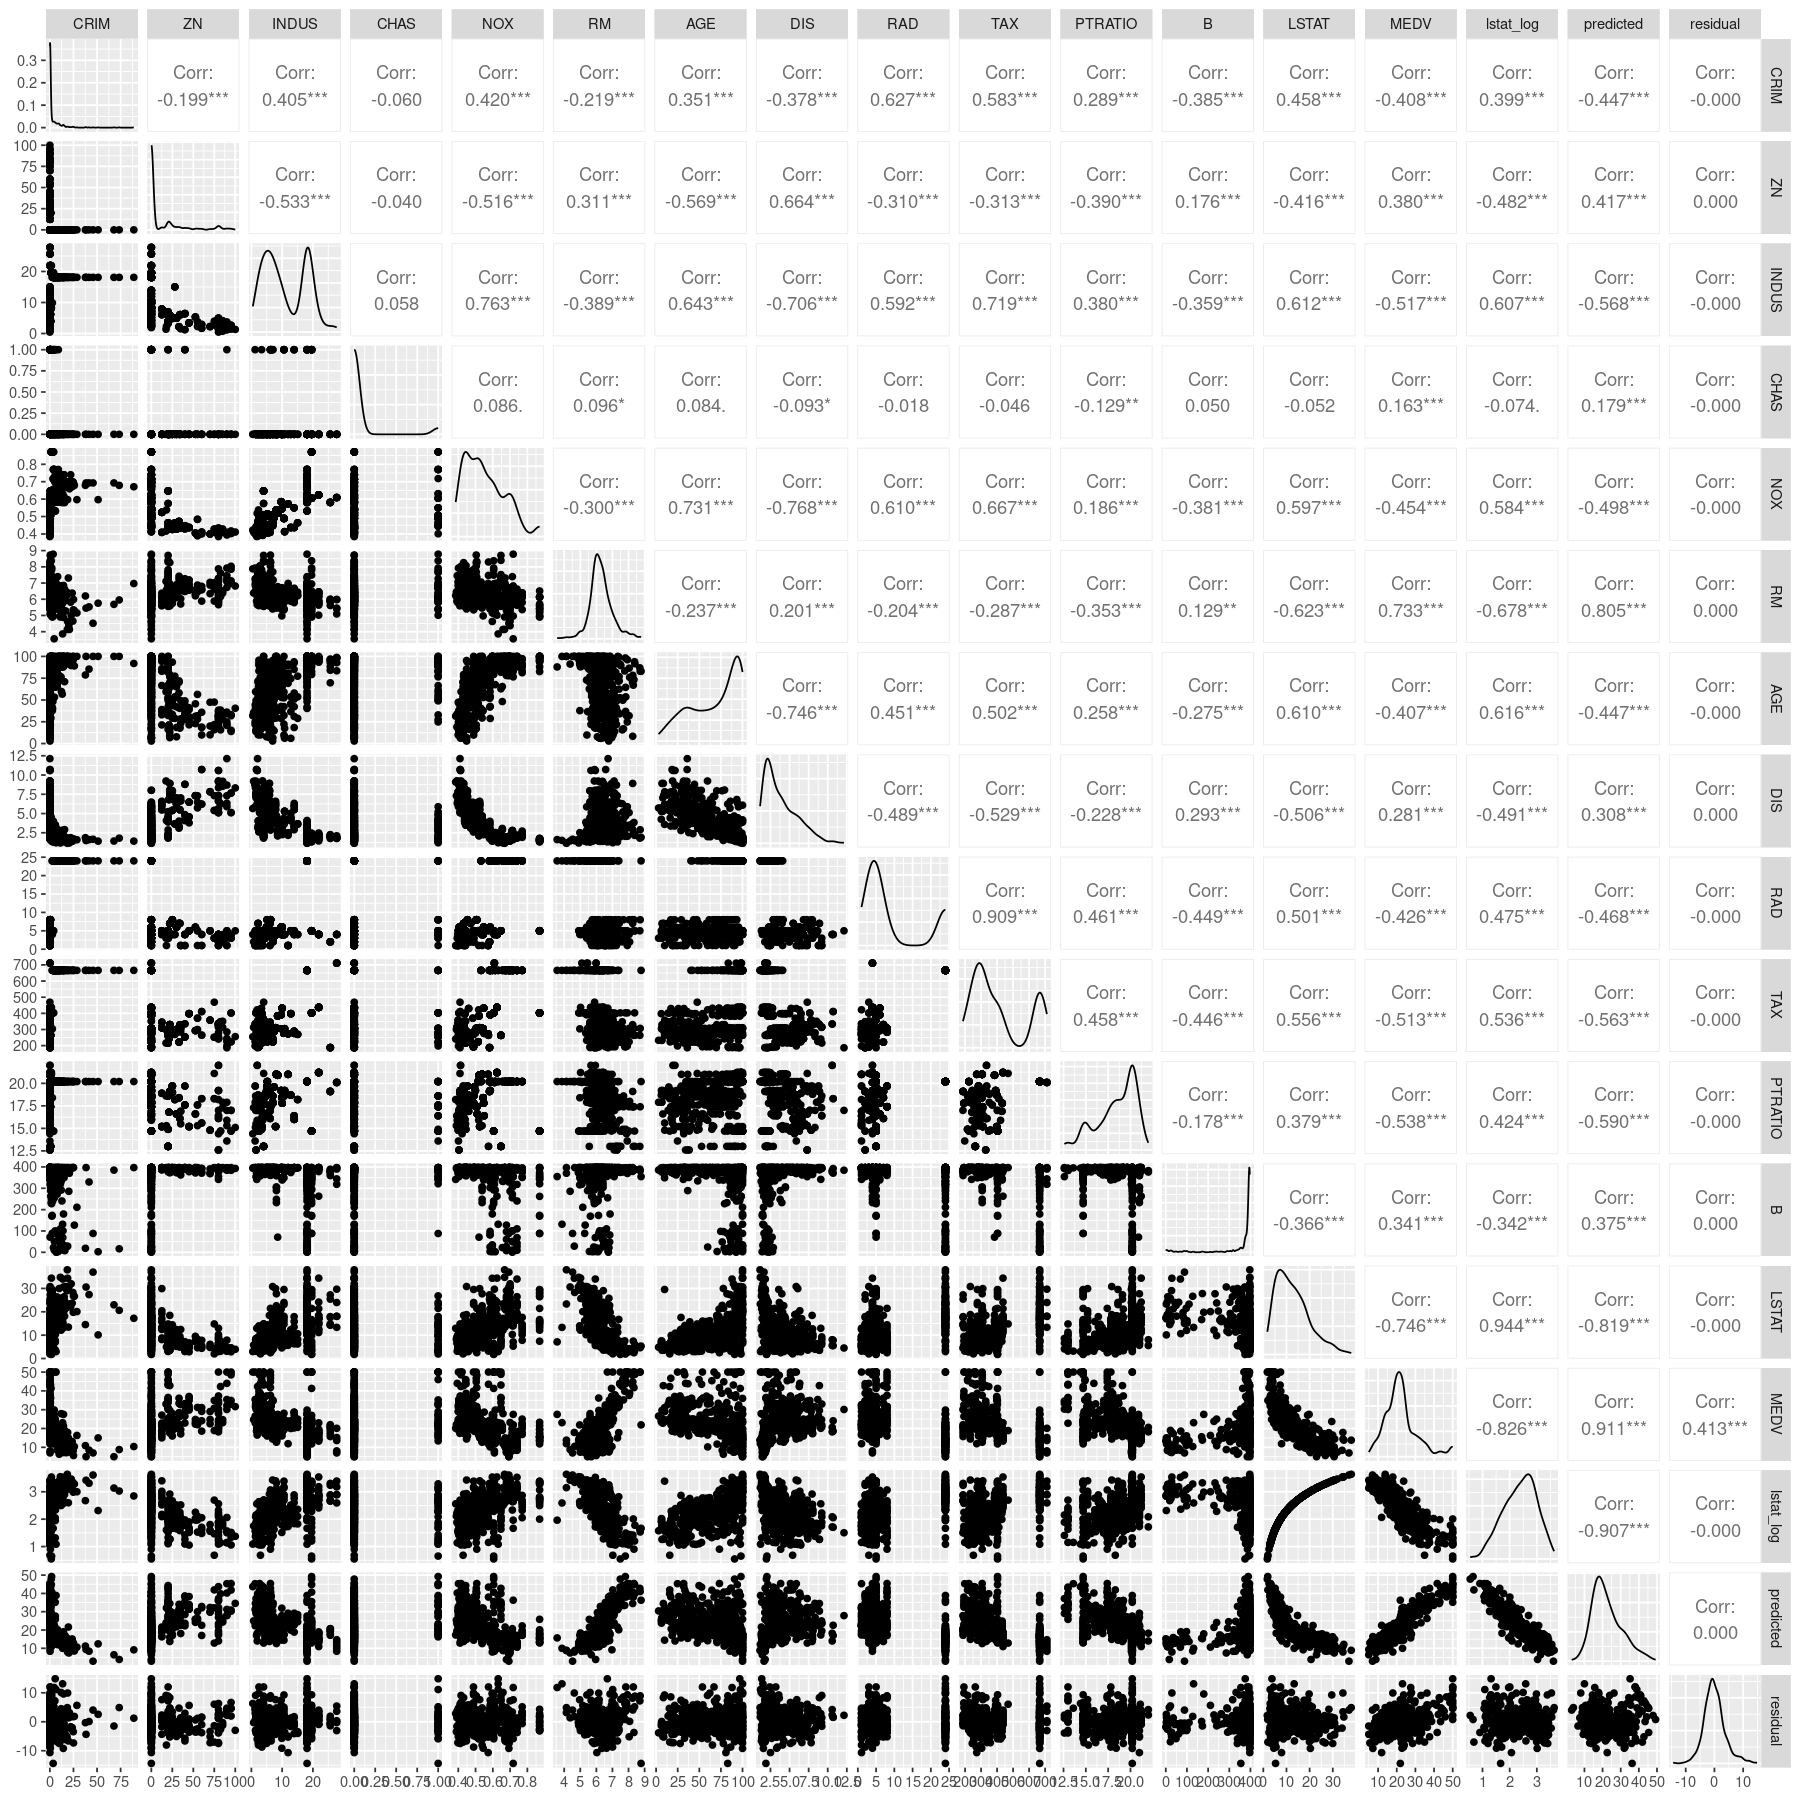

In [22]:
options(repr.plot.width=15, repr.plot.height=15)
ggpairs(nlin_housing)